# SOCIAL NETWORK ADS

### IMPORT ALL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
#!pip install yellowbrick

### READ THE DATA

In [3]:
df=pd.read_excel('Social_Network_Ads.xlsx')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### COULMNS PRESENT IN DATA

In [4]:
df.columns

Index(['User ID ', 'Gender ', 'Age ', 'EstimatedSalary ', 'Purchased'], dtype='object')

### PREPROCESSING THE DATA

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Gender ']=le.fit_transform(df['Gender '])

### DEFINE RANDOM FOREST ALGORITHM

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

### IMPORTANT FEATURES

<ipython-input-30-d26d5e1fc98b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(df[['Gender ', 'Age ', 'EstimatedSalary ']], df[['Purchased']])


Feature: 0, Score: 0.00817
Feature: 1, Score: 0.51262
Feature: 2, Score: 0.47921


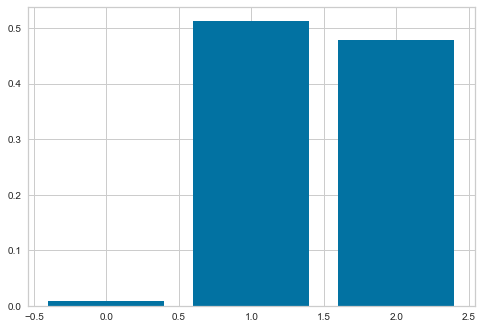

In [30]:
from matplotlib import pyplot
# fit the model
clf.fit(df[['Gender ', 'Age ', 'EstimatedSalary ']], df[['Purchased']])
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### SEPERATE INDEPENDENT AND DEPENDENT (TARGET) VARIABLES

In [69]:
X = df[['EstimatedSalary ','Age ']]
y = df['Purchased']

### ANALYSE THE DATA

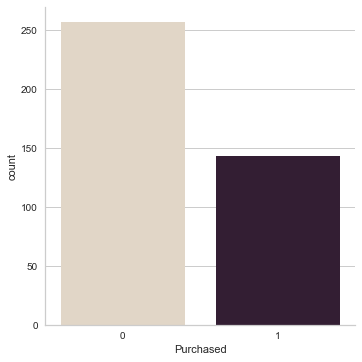

In [50]:
sns.catplot(x="Purchased", kind="count", palette="ch:.25", data=df)

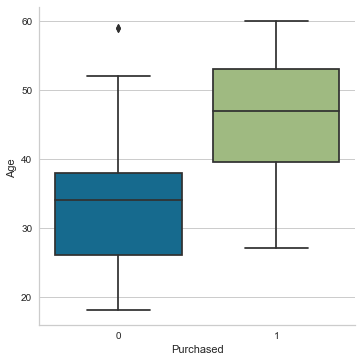

In [48]:
sns.catplot(x="Purchased", y='Age ',kind='box',data=df)

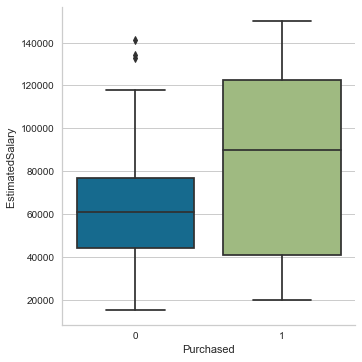

In [52]:
sns.catplot(x="Purchased", y='EstimatedSalary ',kind='box',data=df)

### DEFINE ADABOOST CLASSIFIER WITH BASE AS RANDOM FOREST CLASSIFIER

In [35]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier(n_estimators=52,base_estimator=clf)

### DEVELOP DECISION BOUNDARY USING XGBCLASSIFIER WITH TRAINING AND TESTING DATA

F:\DataScience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
F:\DataScience\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


[22:16:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


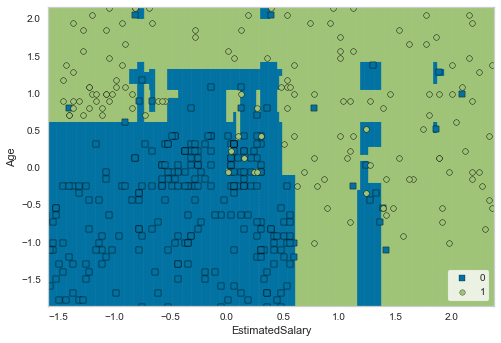

Prediction score: [0.98750000]


F:\DataScience\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


In [76]:
from sklearn.model_selection import train_test_split as tts
from yellowbrick.contrib.classifier import DecisionViz
from xgboost import XGBClassifier



X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = tts(X, y, test_size=.4, random_state=42)

viz = DecisionViz(
    XGBClassifier(), 
    features=['EstimatedSalary','Age'], classes=[0, 1]
)
viz.fit(X_train, y_train)
viz.draw(X, y)
viz.show()
print('Prediction score: [%.8f]' % viz.score(X_train, y_train))

F:\DataScience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
F:\DataScience\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


[22:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


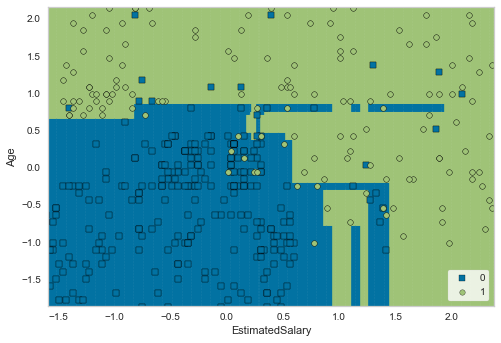

Final prediction score: [0.98125000]


F:\DataScience\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


In [77]:
from sklearn.model_selection import train_test_split as tts
from yellowbrick.contrib.classifier import DecisionViz
from xgboost import XGBClassifier



X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = tts(X, y, test_size=.4, random_state=42)

viz = DecisionViz(
    XGBClassifier(),
    features=['EstimatedSalary','Age'], classes=[0, 1]
)
viz.fit(X_test, y_test)
viz.draw(X, y)
viz.show()
print('Final prediction score: [%.8f]' % viz.score(X_test, y_test))

### DEVELOP DECISION BOUNDARY USING ADABOOST CLASSIFIER WITH TRAINING AND TESTING DATA

F:\DataScience\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


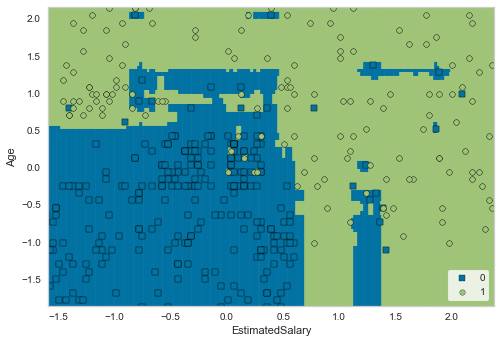

Final prediction score: [1.00000000]


F:\DataScience\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


In [78]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from yellowbrick.contrib.classifier import DecisionViz



X, y = df[['EstimatedSalary ','Age ']],df['Purchased']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = tts(X, y, test_size=.4, random_state=42)

viz = DecisionViz(
    ABC,
    features=['EstimatedSalary','Age'], classes=[0, 1]
)
viz.fit(X_train, y_train)
viz.draw(X, y)
viz.show()
print('Final prediction score: [%.8f]' % viz.score(X_train, y_train))

F:\DataScience\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


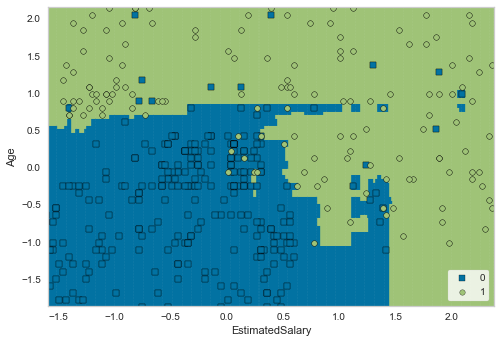

F:\DataScience\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


Final prediction score: [0.99375000]


In [79]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from yellowbrick.contrib.classifier import DecisionViz



X, y = df[['EstimatedSalary ','Age ']],df['Purchased']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = tts(X, y, test_size=.4, random_state=42)

viz = DecisionViz(
    ABC,
    features=['EstimatedSalary','Age'], classes=[0, 1]
)
viz.fit(X_test, y_test)
viz.draw(X, y)
viz.show()
print('Final prediction score: [%.8f]' % viz.score(X_test, y_test))